# Fatigue Analysis 

In [14]:
#Load Libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data from the GitHub URL
github_url = 'https://raw.githubusercontent.com/rohandeakin2/redback-fit-sports-performance/main/Cycling%20Analysis/data/activities_cleaned.csv'
df = pd.read_csv(github_url)

In [15]:
#Display the column names to verify the dataset
print("Column Names in Dataset:")
print(df.columns)

Column Names in Dataset:
Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Elapsed Time', 'Distance', 'Max Heart Rate', 'Relative Effort',
       'Commute', 'Activity Gear', 'Filename', 'Athlete Weight', 'Bike Weight',
       'Elapsed Time.1', 'Moving Time', 'Distance.1', 'Max Speed',
       'Average Speed', 'Elevation Gain', 'Elevation Loss', 'Elevation Low',
       'Elevation High', 'Max Grade', 'Average Grade', 'Max Cadence',
       'Average Cadence', 'Max Heart Rate.1', 'Average Heart Rate',
       'Average Watts', 'Calories', 'Average Temperature', 'Relative Effort.1',
       'Total Work', 'Perceived Exertion', 'Weighted Average Power',
       'Power Count', 'Prefer Perceived Exertion', 'Perceived Relative Effort',
       'Commute.1', 'From Upload', 'Grade Adjusted Distance', 'Bike', 'Gear',
       'Flagged', 'Average Elapsed Speed', 'Dirt Distance', 'Total Steps'],
      dtype='object')



Correlation Matrix:
                    Max Heart Rate  Average Heart Rate  Relative Effort  \
Max Heart Rate            1.000000            0.864409         0.739731   
Average Heart Rate        0.864409            1.000000         0.795930   
Relative Effort           0.739731            0.795930         1.000000   
Calories                  0.417103            0.291868         0.563036   
Max Cadence              -0.563776           -0.595168        -0.416317   
Average Cadence           0.768661            0.825367         0.582188   
Distance                 -0.461963           -0.570611        -0.266405   
Max Speed                -0.421578           -0.473283        -0.382041   
Elapsed Time             -0.241937           -0.351960         0.029190   

                    Calories  Max Cadence  Average Cadence  Distance  \
Max Heart Rate      0.417103    -0.563776         0.768661 -0.461963   
Average Heart Rate  0.291868    -0.595168         0.825367 -0.570611   
Relative Eff

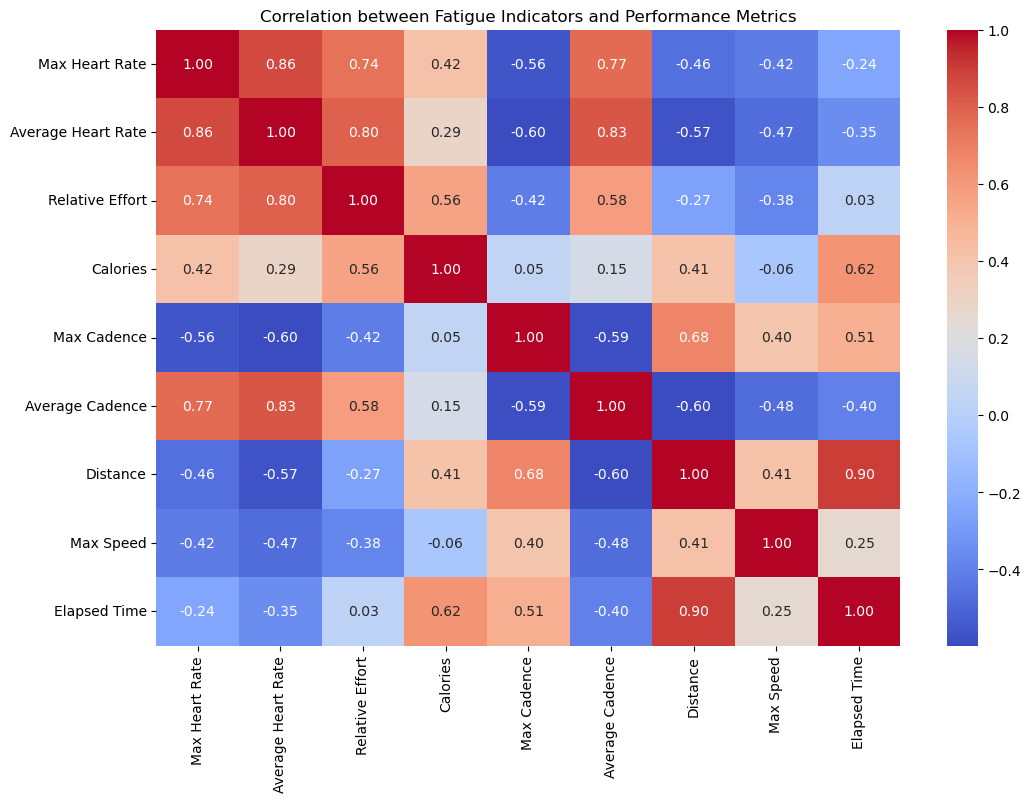

In [17]:
#Identify fatigue indicators and performance metrics
fatigue_indicators = ['Max Heart Rate', 'Average Heart Rate', 'Relative Effort', 'Calories', 'Max Cadence', 'Average Cadence']
performance_metrics = ['Distance', 'Max Speed', 'Elapsed Time']

#Calculate correlations between fatigue indicators and performance metrics
correlation_matrix = df[fatigue_indicators + performance_metrics].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

#Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Fatigue Indicators and Performance Metrics')
plt.show()


In [25]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Convert 'Activity Date' to datetime format
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

# Sort the dataset by 'Activity Date' to ensure activities are in order
df.sort_values(by=['Activity Date'], inplace=True)

# Calculate recovery duration (difference in days between consecutive activities)
df['Recovery Duration'] = df['Activity Date'].diff().dt.total_seconds() / (24 * 3600)  # Convert seconds to days

# Drop the first row since it will have NaN for recovery duration
df.dropna(subset=['Recovery Duration'], inplace=True)

Correlation between Recovery Duration and Performance Metrics (after filtering large gaps):
Recovery Duration    1.000000
Distance             0.056893
Max Speed            0.018858
Elapsed Time         0.043700
Elevation Gain      -0.000827
Name: Recovery Duration, dtype: float64


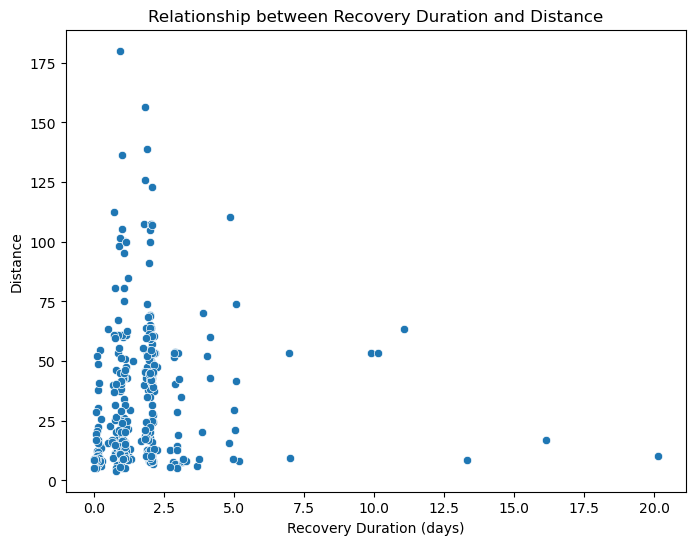

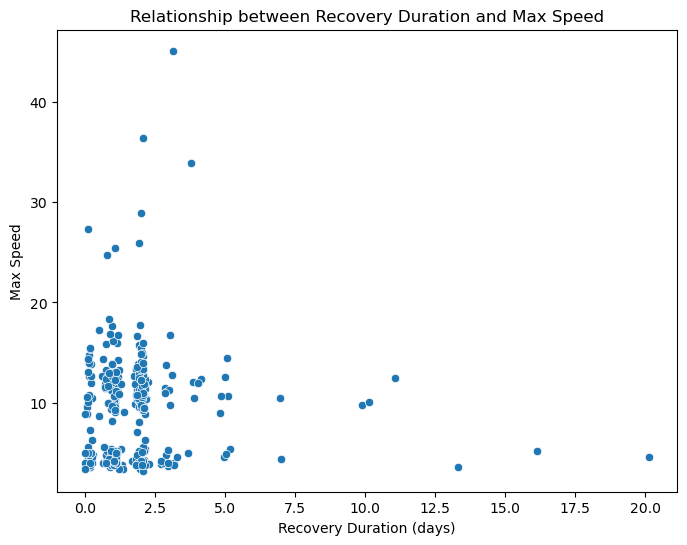

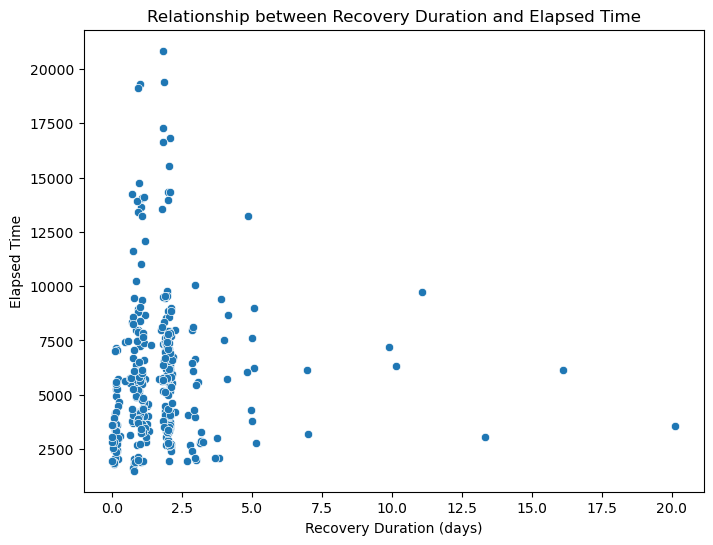

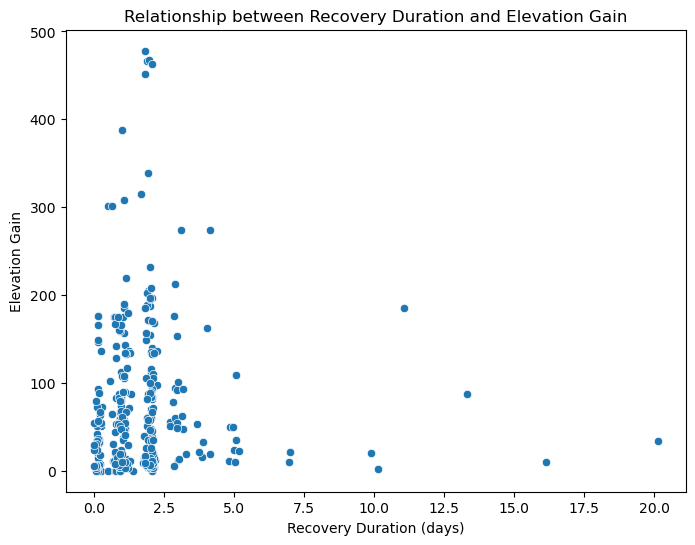


Average Performance Metrics for Each Recovery Duration Bin (after filtering large gaps):
  Recovery Bin   Distance  Max Speed  Elapsed Time  Elevation Gain
0       <1 day  26.777946   8.532691   5261.375000       57.387780
1     1-2 days  41.699912   9.887781   6865.814159       85.743191
2     2-3 days  36.797500   9.288094   6015.092105       71.520033
3     3-5 days  30.925882  12.912477   5114.235294       76.412413
4     5-7 days  37.933333   9.760311   5934.666667       35.012904
5    1-2 weeks  37.604000   8.080000   5900.800000       63.074630
6    2-4 weeks  13.600000   4.888000   4843.000000       21.707861


/var/folders/0t/wyhprnnd3zv1k7khwt5cvrym0000gn/T/ipykernel_6155/13047658.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Recovery Bin'] = pd.cut(filtered_df['Recovery Duration'], bins=recovery_bins, labels=['<1 day', '1-2 days', '2-3 days', '3-5 days', '5-7 days', '1-2 weeks', '2-4 weeks'])


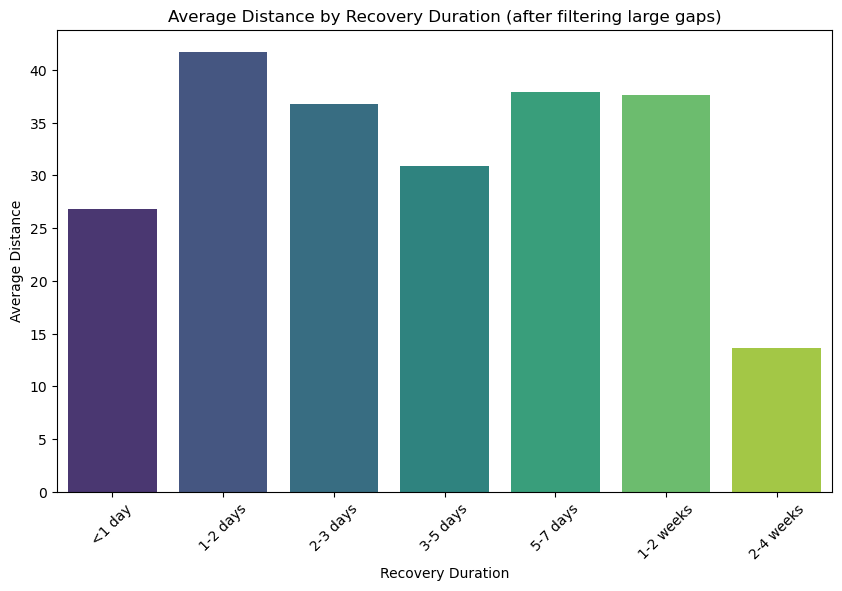

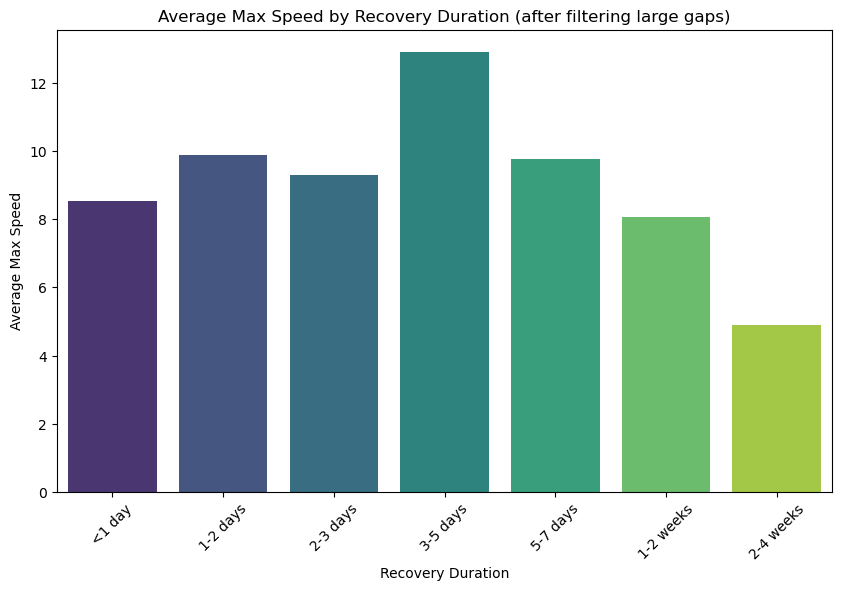

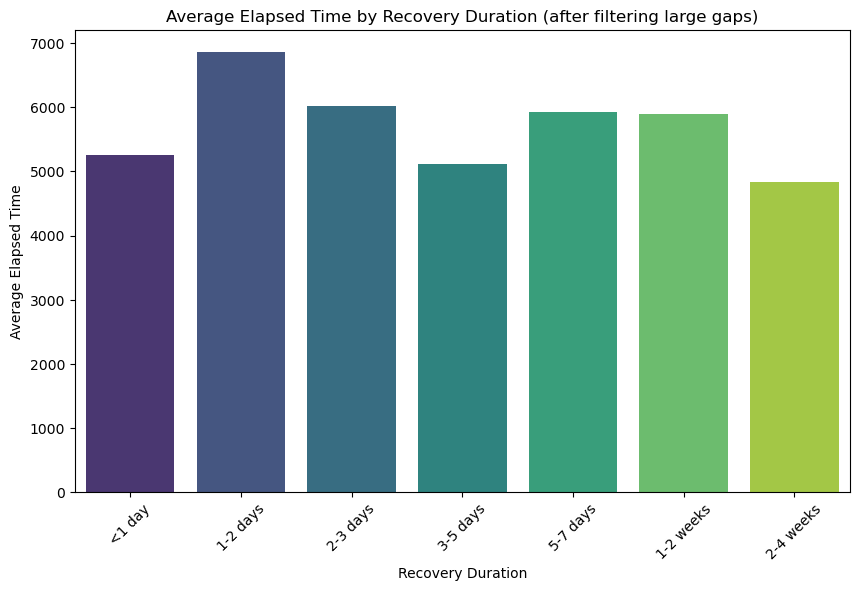

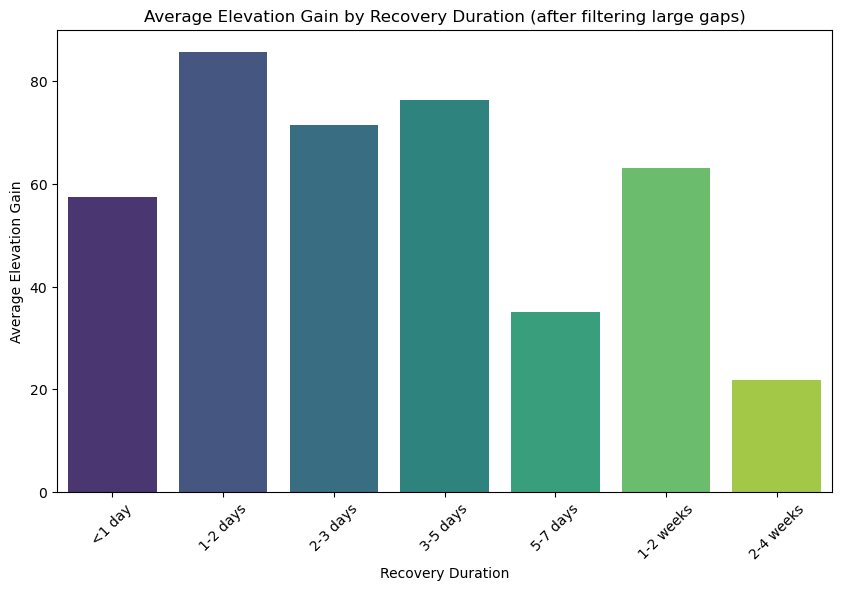

In [24]:
# Set a threshold to filter out large gaps (exclude recovery durations over 14 days)
recovery_duration_threshold = 30
filtered_df = df[df['Recovery Duration'] <= recovery_duration_threshold]

# Calculate correlation between recovery duration and performance metrics using the filtered dataset
performance_metrics = ['Distance', 'Max Speed', 'Elapsed Time', 'Elevation Gain']
correlations = filtered_df[['Recovery Duration'] + performance_metrics].corr()

print("Correlation between Recovery Duration and Performance Metrics (after filtering large gaps):")
print(correlations['Recovery Duration'])

# Visualize the correlation using scatter plots after filtering
for metric in performance_metrics:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Recovery Duration', y=metric, data=filtered_df)
    plt.title(f'Relationship between Recovery Duration and {metric}')
    plt.xlabel('Recovery Duration (days)')
    plt.ylabel(metric)
    plt.show()

# Group by different recovery duration ranges to analyze their impact
# Create bins for recovery durations
recovery_bins = [0, 1, 2, 3, 5, 7, 14, 30]
filtered_df['Recovery Bin'] = pd.cut(filtered_df['Recovery Duration'], bins=recovery_bins, labels=['<1 day', '1-2 days', '2-3 days', '3-5 days', '5-7 days', '1-2 weeks', '2-4 weeks'])

# Calculate average performance metrics for each recovery bin
recovery_analysis = filtered_df.groupby('Recovery Bin')[performance_metrics].mean().reset_index()
print("\nAverage Performance Metrics for Each Recovery Duration Bin (after filtering large gaps):")
print(recovery_analysis)

# Visualize average performance metrics for each recovery bin after filtering
for metric in performance_metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Recovery Bin', y=metric, data=recovery_analysis, palette='viridis')
    plt.title(f'Average {metric} by Recovery Duration (after filtering large gaps)')
    plt.xlabel('Recovery Duration')
    plt.ylabel(f'Average {metric}')
    plt.xticks(rotation=45)
    plt.show()
